In [1]:
import numpy as np
# import torch
import matplotlib.pyplot as plt

In [51]:
# simu_data = np.load('simu.npy',allow_pickle=True)
# simu_data

In [2]:
lam = lambda t:(np.sin(t*2*np.pi), np.cos(t*2*np.pi), 1.5*np.sin(t*2*np.pi)*np.cos(t*2*np.pi))
#lam = lambda t:(np.sin(t), np.cos(t))

#print(lam(2))
U0 = np.array([ [1.0, 1.0, 0.5],
         [-1.5, 1.0, 1.0],
         [1.0, -1.5, 1.0]])

U1 = np.array([ [-0.5,1.0, 0.1],
         [1.0, 0.5, 1.0],
         [0.10, 0.8, -0.5]])

U = [U0, U1]
dims = [3,3]
N = 2000
N_test = 500
time_points = np.linspace(0, 1, N)
time_points_test = np.sort(np.random.rand(N_test))

In [3]:
train_ind = []
train_y = []
train_time = time_points
noise = 0.05

test_ind = []
test_y = []
test_time = time_points_test

t_train = 0
while True:

    if t_train>=N:
        break

    for i in range(dims[0]):
        if t_train>=N:
            break
        
        for j in range(dims[1]):
                lam_t = np.array( lam(time_points[t_train]) )
                # val = np.sum(U[0][i,:]*U[1][j,:]*lam_t) + np.random.randn()*noise
                val = np.sum(U[0][i,:]*U[1][j,:]) + np.random.randn()*noise

                train_ind.append([i,j])
                train_y.append(val)

                t_train = t_train + 1

                if t_train>=N:
                    break

t_test = 0
while True:
    
    if t_test>=N_test:
        break

    for i in range(dims[0]):
        if t_test>=N_test:
            break
        
        for j in range(dims[1]):
                lam_t = np.array( lam(time_points_test[t_test]) )
                # val = np.sum(U[0][i,:]*U[1][j,:]*lam_t)
                val = np.sum(U[0][i,:]*U[1][j,:]) 
                 
                test_ind.append([i,j])
                test_y.append(val)

                t_test = t_test + 1

                if t_test>=N_test:
                    break



In [4]:
data = {'train_ind':np.array(train_ind), 'train_y':np.array(train_y), 'train_time':train_time, 
'test_ind':np.array(test_ind), 'test_y':np.array(test_y), 'test_time':test_time, 'test_time':test_time,'U':U}
np.save('simu_no_t.npy', data)

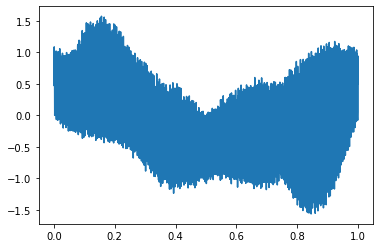

In [43]:
plt.plot(time_points,train_y)

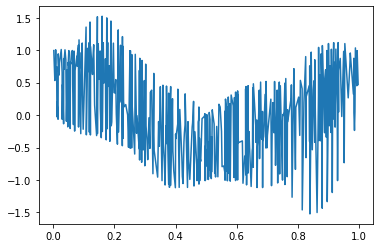

In [44]:
plt.plot(time_points_test,test_y)